# **MNIST classifications**


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
if torch.cuda.is_available():
  device = 'cuda'
  print('cuda')
else:
  device = 'cpu'
  print('cpu')

cuda


In [ ]:
# Normalizing pixels (-1 to 1) with Transform library

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, ), (0.5, ))])


In [ ]:
# Loading builtin dataset (MNIST)

# Loading training set
trainset = torchvision.datasets.MNIST(
    'mnist',
    train = True,
    download = True,
    transform = transform
)

# Loading testing set
testset = torchvision.datasets.MNIST(
    'mnist',
    train = False,
    download = True,
    transform = transform
)


Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 9912422/9912422 [00:01<00:00, 5025877.99it/s]


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 28881/28881 [00:00<00:00, 132965.06it/s]


Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 1648877/1648877 [00:01<00:00, 1265881.22it/s]


Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12742828.61it/s]

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



In [ ]:
print(trainset.data.shape)
print(testset.data.shape)
print(trainset.data[0])

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,  

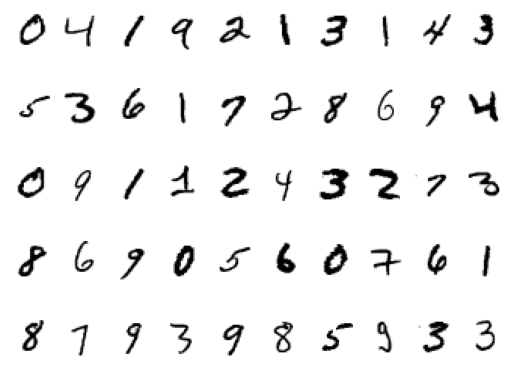

In [ ]:
# Plotting several data samples

figure = plt.figure()
numberOfSamples = 50

for i in range(1, numberOfSamples + 1):
  plt.subplot(5, 10, i)
  plt.axis('off')
  plt.imshow(trainset.data[i], cmap = 'gray_r')

In [ ]:
# Preparing data loaders

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size = 128,
                                          shuffle = True,
                                          num_workers = 0
                                          )

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size = 128,
                                         shuffle = False,
                                         num_workers = 0
                                         )

In [ ]:
# Making dataloaders iterable

dataiter = iter(trainloader)

images, labels = next(dataiter)

print(images.shape)
print(labels.shape)
print(images[0].shape)


torch.Size([128, 1, 28, 28])
torch.Size([128])
torch.Size([1, 28, 28])


In [ ]:
# Building a model

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, 3)
    self.conv2 = nn.Conv2d(32, 64, 3)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(64*12*12, 128)
    self.fc2 = nn.Linear(128, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 64*12*12)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

net = Net()
net.to(device)


Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
# Setting up the loss and optimizer

criterion = nn.CrossEntropyLoss() # The loss function
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9) # The optimizer

In [ ]:
# Training a model

epochs = 10
epoch_log    = []
loss_log     = []
accuracy_log = []


for epoch in range(epochs):
  print(f'Srarting Epoch: {epoch+1}...')

  running_loss = 0.0

  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()


    # Evaluation
    if i % 50 == 49:
      correct = 0
      total = 0
      with torch.no_grad():
        for data in testloader:
          images, labels = data
          images = images.to(device)
          labels = labels.to(device)

          outputs = net(images)

          _, predicted = torch.max(outputs.data, dim = 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

      accuracy = 100 * correct / total
      epoch_num = epoch + 1
      actual_loss = running_loss / 50
      print(f'Epoch: {epoch_num}, Mini_Batches Completed: {(i+1)}, Loss: {actual_loss: .3f}, Test Accuracy = {accuracy: .3f}%')

  # Store training stats after each epoch
  epoch_log.append(epoch_num)
  loss_log.append(actual_loss)
  accuracy_log.append(accuracy)

print('Finished Training')

Srarting Epoch: 1...
Epoch: 1, Mini_Batches Completed: 50, Loss:  2.267, Test Accuracy =  36.360%
Epoch: 1, Mini_Batches Completed: 100, Loss:  4.370, Test Accuracy =  62.800%
Epoch: 1, Mini_Batches Completed: 150, Loss:  5.984, Test Accuracy =  80.510%
Epoch: 1, Mini_Batches Completed: 200, Loss:  6.862, Test Accuracy =  85.610%
Epoch: 1, Mini_Batches Completed: 250, Loss:  7.410, Test Accuracy =  86.890%
Epoch: 1, Mini_Batches Completed: 300, Loss:  7.869, Test Accuracy =  88.380%
Epoch: 1, Mini_Batches Completed: 350, Loss:  8.272, Test Accuracy =  89.220%
Epoch: 1, Mini_Batches Completed: 400, Loss:  8.672, Test Accuracy =  89.720%
Epoch: 1, Mini_Batches Completed: 450, Loss:  9.048, Test Accuracy =  89.730%
Srarting Epoch: 2...
Epoch: 2, Mini_Batches Completed: 50, Loss:  0.336, Test Accuracy =  90.790%
Epoch: 2, Mini_Batches Completed: 100, Loss:  0.695, Test Accuracy =  90.200%
Epoch: 2, Mini_Batches Completed: 150, Loss:  1.031, Test Accuracy =  91.410%
Epoch: 2, Mini_Batches C

In [ ]:
# Saving the trained model weights

path = './mnist_CNN.pth'
torch.save(net.state_dict(), path)

In [ ]:
# Reusing a pre-trained model using the model and its .pth file (The model we just trained)

pth = './mnist_CNN.pth'
net = Net()
net.to(device)
net.load_state_dict(torch.load(pth))

<All keys matched successfully>

In [ ]:
# Using the pre-trained model to test

test_iter = iter(testloader)

images, labels = next(test_iter)
images = images.to(device)
labels = labels.to(device)

outputs = net(images)

_, predicted = torch.max(outputs, 1)

for i in range (128):
  print(predicted[i].cpu().numpy())

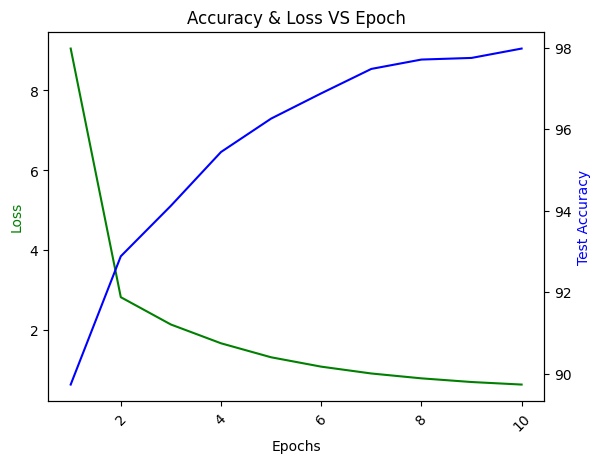

In [ ]:
# Plotting results

# A plot with a secondary y axis
fig, ax1 = plt.subplots()

plt.title('Accuracy & Loss VS Epoch')
plt.xticks(rotation=45)

ax2 = ax1.twinx()

ax1.plot(epoch_log, loss_log, 'g-')
ax2.plot(epoch_log, accuracy_log, 'b-')

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color= 'g')
ax2 .set_ylabel('Test Accuracy', color= 'b')

plt.show()

In [ ]:
# Reusing a pre-trained model using the model and its .pth file

pth = './mnist_CNN.pth'
net = Net()
net.to(device)
net.load_state_dict(torch.load(pth))

In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in testloader:
    images, labels = data
    images = images.to(device)
    labels = labels.to(device)
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'{accuracy: .3}')

 98.0


Actual label: 4, Predicted Label: 9
Actual label: 4, Predicted Label: 2
Actual label: 6, Predicted Label: 0
Actual label: 2, Predicted Label: 7
Actual label: 5, Predicted Label: 3
Actual label: 6, Predicted Label: 0
Actual label: 3, Predicted Label: 5
Actual label: 7, Predicted Label: 3
Actual label: 8, Predicted Label: 2
Actual label: 2, Predicted Label: 8
Actual label: 2, Predicted Label: 8
Actual label: 1, Predicted Label: 8
Actual label: 2, Predicted Label: 1
Actual label: 7, Predicted Label: 3
Actual label: 0, Predicted Label: 6
Actual label: 5, Predicted Label: 8
Actual label: 4, Predicted Label: 9
Actual label: 7, Predicted Label: 9
Actual label: 9, Predicted Label: 7
Actual label: 3, Predicted Label: 5
Actual label: 7, Predicted Label: 3
Actual label: 3, Predicted Label: 5
Actual label: 8, Predicted Label: 9
Actual label: 6, Predicted Label: 0
Actual label: 6, Predicted Label: 5
Actual label: 7, Predicted Label: 9
Actual label: 6, Predicted Label: 8
Actual label: 4, Predicted L

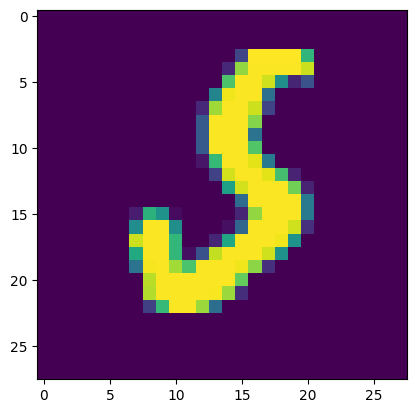

In [ ]:
# Finding missclassifications

net.eval()

with torch.no_grad():
  for data in testloader:
    images, labels = data
    images = images.to(device)
    labels = labels.to(device)

    outputs = net(images)

    predictions = torch.argmax(outputs, dim=1)

    for i in range(data[0].shape[0]):
      pred = predictions[i].item()
      label = labels[i]

      if(label != pred):
        print(f'Actual label: {label}, Predicted Label: {pred}')
        img = np.reshape(images[i].cpu().numpy(), [28,28])
        plt.imshow(img)

In [ ]:
# Making confusion matrix

pred_list = torch.zeros(0, dtype = torch.long, device = 'cpu')
label_list = torch.zeros(0, dtype = torch.long, device = 'cpu')

with torch.no_grad():
  for i, (inputs, classes) in enumerate(testloader):
    inputs = inputs.to(device)
    classes = classes.to(device)

    outputs = net(inputs)
    _, preds = torch.max(outputs, 1)

    pred_list = torch.cat([pred_list, preds.view(-1).cpu()])
    label_list = torch.cat([label_list, classes.view(-1).cpu()])

confusion_matrix = confusion_matrix(label_list.numpy(), pred_list.numpy())
print(confusion_matrix)


[[ 972    0    1    1    0    0    2    1    2    1]
 [   0 1127    1    2    0    2    2    0    1    0]
 [   3    5 1005    8    2    0    1    4    4    0]
 [   0    0    1  997    0    5    0    1    3    3]
 [   1    0    5    0  962    0    2    1    2    9]
 [   3    0    0    3    0  879    4    1    2    0]
 [   7    2    1    1    4    8  933    0    2    0]
 [   2    4   12   11    0    0    0  991    0    8]
 [   5    0    1    4    2    5    2    2  949    4]
 [   3    4    0    5    5    4    1    4    1  982]]


In [ ]:
# Accuracy per class

class_accuracy = 100 * confusion_matrix.diagonal() / confusion_matrix.sum(1)

for (i,ca) in enumerate(class_accuracy):
  print(f'Accuracy: {i}: {ca:.3f}%')

Accuracy: 0: 99.184%
Accuracy: 1: 99.295%
Accuracy: 2: 97.384%
Accuracy: 3: 98.713%
Accuracy: 4: 97.963%
Accuracy: 5: 98.543%
Accuracy: 6: 97.390%
Accuracy: 7: 96.401%
Accuracy: 8: 97.433%
Accuracy: 9: 97.324%


In [ ]:
print(classification_report(label_list.numpy(), pred_list.numpy()))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.97      0.99      0.98       892
           6       0.99      0.97      0.98       958
           7       0.99      0.96      0.97      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# **Fashion MNIST with & without "Regularization"**

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import PIL

In [ ]:
if torch.cuda.is_available():
  device= 'cuda'
  print('cuda')
else:
  device = 'cpu'
  print('cpu')

cuda


In [ ]:
# Adding data augmentation

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomAffine(degrees = 10, translate = (0.05,0.05), shear = 5),
        transforms.ColorJitter(hue = .05, saturation = .05),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15, interpolation = PIL.Image.BILINEAR),
        transforms.Grayscale(num_output_channels = 1),
        transforms.ToTensor(),
        transforms.Normalize((0.5, ), (0.5, )),
    ]),
    # Note that validation process has no augmentation but just normalization
    'val': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, ), (0.5, ))
    ])
}

In [ ]:
# Preparing dataset

trainset = torchvision.datasets.FashionMNIST(root = './data',
                                             download = True,
                                             transform = data_transforms['train']
                                             )
testset = torchvision.datasets.FashionMNIST(root = './data',
                                            download = True,
                                            transform = data_transforms['val']
                                            )

In [ ]:
# Preparing dataloaders

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size = 32,
                                          shuffle = True,
                                          num_workers = 2
                                          )
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size = 32,
                                         shuffle = True,
                                         num_workers = 2
                                         )
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')


In [ ]:
# We have 60,000 Image samples for our training data & 10,000 for our test data
# each 28 x 28 pixels, as they are grayscale, there is no 3rd dimension to our image

print(trainset.data.shape)
print(testset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


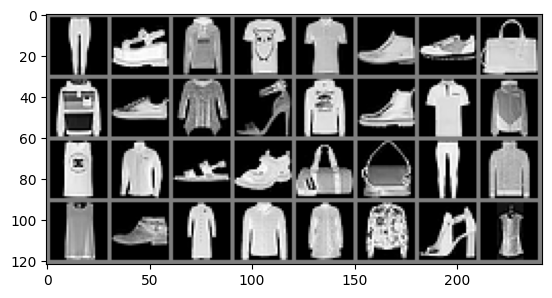

In [ ]:
# Showing data samples

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def imshow2(img):
  npimage = img.numpy()
  plt.imshow(np.transpose(npimage, (1,2,0)))
  plt.show()

# Get some random training images
dataiter = iter(trainloader)
images,  labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))


In [ ]:
# Adding DropOut and BatchNormalization regularizations to the network

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv1_bn = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv2_bn = nn.BatchNorm2d(64)

        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)

        self.dropOut = nn.Dropout(0.2)

    def forward(self, x):
        x = F.relu(self.conv1_bn(self.conv1(x)))

        x = self.dropOut(x)

        x = self.dropOut(F.relu(self.conv2_bn(self.conv2(x))))

        x = self.pool(x)
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (dropOut): Dropout(p=0.2, inplace=False)
)

In [ ]:
# Adding L2 regularization (which is called in pytorch 'weight_decay')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay = 0.001)

In [ ]:
# Training loop

epochs = 10

epoch_log = []
loss_log = []
accuracy_log = []

for epoch in range(epochs):
    print(f'Starting Epoch: {epoch+1}...')

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Forward -> backprop + optimize
        outputs = net(inputs) # Forward Propagation
        loss = criterion(outputs, labels) # Get Loss (quantify the difference between the results and predictions)
        loss.backward() # Back propagate to obtain the new gradients for all nodes
        optimizer.step() # Update the gradients/weights

        running_loss += loss.item()
        if i % 100 == 99:
            correct = 0
            total = 0

            with torch.no_grad():
                for data in testloader:
                    images, labels = data
                    images = images.to(device)
                    labels = labels.to(device)

                    outputs = net(images)

                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

                accuracy = 100 * correct / total
                epoch_num = epoch + 1
                actual_loss = running_loss / 50
                print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i+1)}, Loss: {actual_loss:.3f}, Test Accuracy = {accuracy:.3f}%')
                running_loss = 0.0

    # Store training stats after each epoch
    epoch_log.append(epoch_num)
    loss_log.append(actual_loss)
    accuracy_log.append(accuracy)

print('Finished Training')


In [ ]:
# The difference between this accuracy and training accuracy is that it's the average over the results

correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Move our data to GPU
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.4}%')


In [ ]:
fig, ax1 = plt.subplots()

plt.title("Accuracy & Loss vs Epoch Mini-Batches")
plt.xticks(rotation=45)

ax2 = ax1.twinx()

ax1.plot(epoch_log, loss_log, 'g-')
ax2.plot(epoch_log, accuracy_log, 'b-')

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Test Accuracy', color='b')

plt.show()